In [1]:
import numpy as np
import matplotlib.pyplot as plt

## KNN-model class

In [2]:
class KNN:
    def __init__(self, k = 5):
        self.k = k
        

    def fit(self, X, y):
        self.X = X
        self.y = y
        
    
    def predict(self, X):
        res = []
        for i in range(X.shape[0]):
            dist = np.linalg.norm(self.X - X[i, ...], axis = 1)

            # sort target according to distances
            sorted_dist, sorted_y = list(zip(*sorted(zip(dist, self.y), key = lambda x: x[0])))

            # take k closest targets and find most common one 
            res.append(np.argmax(np.bincount(sorted_y[:self.k])))

        return np.asarray(res)
 

## Test

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, 
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_classes = 3,
                           n_clusters_per_class = 1,
                           random_state = 42)

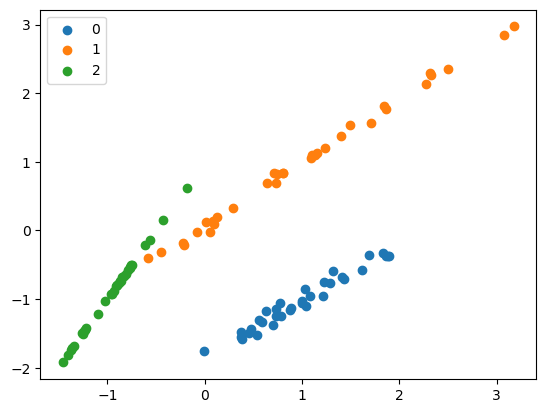

In [4]:
for cls in np.unique(y):
    mask = y == cls
    plt.scatter(X[mask, 0], X[mask, 1], label = cls)
plt.legend()

In [5]:
# on real data use StandardScaler first!
knn = KNN()
knn.fit(X, y)

In [6]:
test = np.array([[-1, -1], [1, 1], [2, -1], [-0.8, -0.4], [3, 1]])
test

array([[-1. , -1. ],
       [ 1. ,  1. ],
       [ 2. , -1. ],
       [-0.8, -0.4],
       [ 3. ,  1. ]])

In [7]:
pred = knn.predict(test)
pred

array([2, 1, 0, 2, 1], dtype=int64)

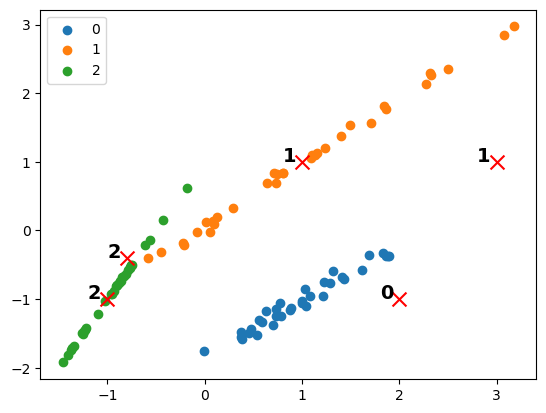

In [8]:
for cls in np.unique(y):
    mask = y == cls
    plt.scatter(X[mask, 0], X[mask, 1], label = cls)

for i in range(pred.shape[0]):
    label = pred[i]
    point = test[i, ...]
    plt.scatter(point[0], point[1], c = 'r', s = [100], marker = 'x')
    plt.text(point[0] - 0.2, point[1], f'{label}', fontsize = 14, fontweight = 700)
    
plt.legend()